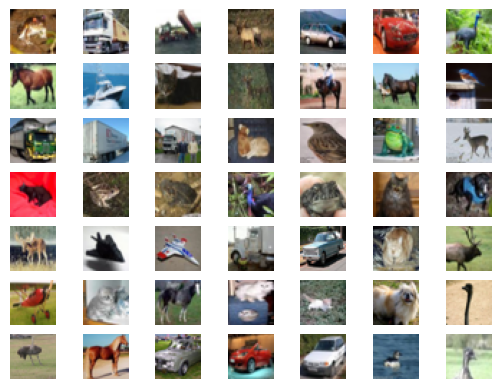

In [1]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot

(trainX,trainy),(testX,testy) = load_data()

for i in range(49):
    pyplot.subplot(7,7, 1+i)

    pyplot.axis('off')
    pyplot.imshow(trainX[i])

pyplot.show()

In [2]:
print(trainX.shape)

(50000, 32, 32, 3)


In [3]:
#import the model help me built descrimination model

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model

import numpy as np


In [4]:
# define descriminator model

def define_discrimnator(in_shape=(32,32,3)):
    model = Sequential()

    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3), strides=(2,2) ,padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3), strides=(2,2) ,padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256, (3,3), strides=(2,2) ,padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))

    model.add(Dense(1, activation='sigmoid'))

    #compile model

    opt = Adam(learning_rate=0.0002, beta_1 = 0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model




In [5]:
#define model

model = define_discrimnator()

model.summary()

plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

C:\Users\PREET\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\PREET\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [6]:

def load_real_samples():
    (trainX,_),(_,_) = load_data()

    X = trainX.astype('float32')
    X = (X-127.5) / 127.5

    return X


In [7]:
X = load_real_samples()
X.shape

(50000, 32, 32, 3)

In [8]:
#select real samples

def generate_real_sample(datasets, n_samples):
    ix = np.random.randint(0, datasets.shape[0], n_samples)

    X = datasets[ix]
    y = np.ones((n_samples,1))
    return X,y

In [9]:
# generate generate_Fake_sample

def generate_fake_sample(n_samples):
    X = np.random.rand(32*32*3*n_samples)

    X = -1 + X * 2
    X = X.reshape((n_samples,32,32,3))
    y = np.zeros((n_samples,1))
    return X,y

In [10]:
X,y = generate_fake_sample(64)

In [11]:
# train the descriminator model temporarily

def train_discriminator(model, dataset, n_iter = 20, n_batch=128 ):
    half_batch = int(n_batch / 2)

    for i in range(n_iter):
        X_real , y_real = generate_real_sample(dataset, half_batch)
        _, real_acc = model.train_on_batch(X_real, y_real)

        X_fake,y_fake = generate_fake_sample(half_batch)
        _, fake_acc = model.train_on_batch(X_fake,y_fake)

In [12]:
# defininf the descrimination model

model = define_discrimnator()

dataset = load_real_samples()

train_discriminator(model, dataset)

In [13]:
from keras.layers import Conv2DTranspose
from keras.layers import Reshape



In [14]:
def define_generator(latent_dim):
    model = Sequential()

    n_nodes = 256 *4 *4
    model.add(Dense(n_nodes, input_dim = latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4,4,256)))

    model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(3,(3,3), activation='tanh', padding='same'))

    return model

In [15]:
latent_dim = 100

model = define_generator(latent_dim)

model.summary()

plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

C:\Users\PREET\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 4096)                │         413,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 32, 32, 3)           │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [16]:
# generate  points in latent space as input for the generator

def generator_latent_points(latent_dim, n_samples):

    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples,latent_dim)

    return x_input

In [17]:
x_input = generator_latent_points(100,64)

print(x_input.shape)

(64, 100)


In [18]:
# use the generator to generate n fake examples, with class labels

def generate_fake_samples(g_model, latent_dim, n_sample):
    x_input = generator_latent_points(latent_dim,n_sample)

    X = g_model.predict(x_input)
    y = np.zeros((n_sample,1))

    return X,y

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


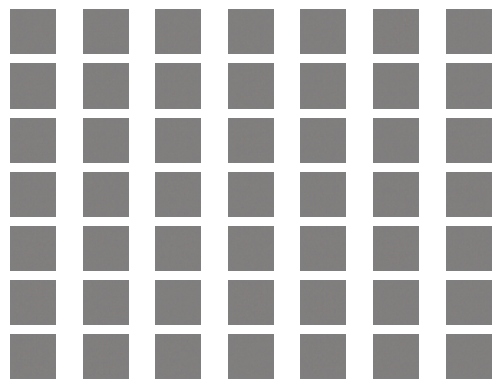

In [28]:
latent_dim = 100

model = define_generator(latent_dim)

n_sample = 49

X,_  = generate_fake_samples(model, latent_dim, n_sample)

X = (X +1 ) / 2.0

for i in range(n_sample):
    pyplot.subplot(7,7,1 + i)

    pyplot.axis('off')
    pyplot.imshow(X[i])

pyplot.show()


In [ ]:
# ------------------------- important part starts ------------------------

In [30]:
def define_gan(g_model,d_model):
    d_model.trainable = False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)

    opt = Adam(learning_rate=0.0002, beta_1 = 0.5)

    model.compile(loss='binary_crossentropy', optimizer=opt)

    return model

In [32]:
latent_dim = 100

d_model = define_discrimnator()

g_model = define_generator(latent_dim)

gan_model = define_gan(g_model,d_model)

gan_model.summary()



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 32, 32, 3)           │       1,466,115 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 1)                   │         522,497 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,988,612 (7.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 522,497 (1.99 MB)

In [ ]:
# train the generator and discriminator 

In [68]:
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epocchs=200,n_batch=128):
    
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)

    for i in range(n_epocchs):
        for j in range(bat_per_epo):
            X_real,y_real = generate_real_sample(dataset,half_batch)

            d_loss1, _ = d_model.train_on_batch(X_real,y_real)

            X_fake , y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            
            d_loss2,_ = d_model.train_on_batch(X_fake,y_fake)

            X_gan = generator_latent_points(latent_dim, n_batch) 

            y_gan = np.ones((n_batch,1))
            g_loss = gan_model.train_on_batch(X_gan,y_gan)

            if (i+1) % 10 == 0:
                summarize_performance(i,g_model,d_model, dataset, latent_dim)



In [70]:
def summarize_performance(epoch,g_model,d_model,dataset,latent_dim,n_sample=150):
    X_real,y_real = generate_real_sample(dataset,n_samples)
    _, acc_real = d_model.evaluate(X_real,y_real,verbose=0)
    x_fake,x_fake = generate_fake_sample(g_model, latent_dim,n_samples)

    _, acc_fake = d_model.evaluate(x_fake,x_fake,verbose=0)

    print('accuracy real : %.0f%%, fake:%.0f%%' % (acc_real*100, acc_fake*100))

    save_plot(x_fake,epoch)

    filename = 'generator_model_%03d.h5' % (epoch+1)
    g_model.save(filename)


In [72]:
# create and save a plot of generated images

def save_plot(examples, epoch, n=7):
    examples = (examples + 1) / 2.0

    for i in range(n*n):
        pyplot.subplot(n,n,1+i)

        pyplot.axis('off')

        pyplot.imshow(examples[i])
        pyplot.savefig(filename)
        pyplot.close()

In [ ]:
train(g_model,d_model,gan_model,dataset,latent_dim,n_batch=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━